**Copyright (c) 2023 Sameer Nimse**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## **Data Science Engineering Methods And Tools**
ML Data Cleaning and Feature Selection

**Abstract:**
In this project I have used body building supplement and Nutrition products dataset. Th main goal is to predict the price per serving of the supplement.

## Data Set
The data set consists of :

14 physical characteristics i.e. average flavor rating, brand name, link, number of flavors, number of reviews, overall rating, price,
product category, product_description, product name top flavor rated, verified buyer number, verified buyer rating -
The independent variables

Price per serving- The target variable
There are a total of 840 rows and 14 columns

### Variable Description:

**average_flavor_rating**: The average of the flavor rated by the user

**brand_name**           : The name of the brand

**link**                 : The link of the product

**number_of_flavors**    : The total number of flavors that brand has

**number_of_reviews**    : The total number of reviews for a product

**overall_rating**       : The overall rating of the product

**price**                : The actual price of the product

**price_per_serving**    : The cost of the supplement per serving

**product_category**     : The category of the supplement

**product_description**   : The description of the product

**product_name**          : The name of the product

**top_flavor_rated**      : Top flavor of a particular supplement

**verified_buyer_number** : The number of the verified buyer

**verified_buyer_rating** : The rating of the verified buyer


In [336]:
#installing dependencies
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

**Loading the Dataset**

In [338]:
#Reading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/sameernimse09/Data-Science/main/bodybuilding_nutrition_products.csv")

In [339]:
#Viewing data in the file 
data.head()

,average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
0,9.1,EVLUTION NUTRITION,https://sa.bodybuilding.com/store/evlution-nut...,29.0,2575.0,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,BCAA Energy,Pink Starblast,1594,9.0
1,8.4,Optimum Nutrition,https://sa.bodybuilding.com/store/opt/whey.htm...,43.0,9926.0,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,Gold Standard 100% Whey,Unflavored,3932,9.0
2,8.3,JYM Supplement Science,https://sa.bodybuilding.com/store/jym/pre-jym....,9.0,3947.0,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,Pre JYM,Raspberry Lemonade,3471,9.0
3,NaN,Optimum Nutrition,https://sa.bodybuilding.com/store/opt/essentia...,NaN,2466.0,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural S...,Essential AmiN.O. Energy,NaN,NaN,NaN
4,8.7,JYM Supplement Science,https://sa.bodybuilding.com/store/jym/pro-jym....,14.0,2506.0,9.2,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",Pro JYM,S'mores,2275,9.0


Getting the Unique values in a dataset

In [340]:
data.nunique()

average_flavor_rating     38
brand_name                93
link                     840
number_of_flavors         24
number_of_reviews        285
overall_rating            39
price                    481
price_per_serving        241
product_category          79
product_description      606
product_name             590
top_flavor_rated         168
verified_buyer_number    148
verified_buyer_rating      7
dtype: int64

In [341]:
data.shape

(840, 14)

**Are there missing values?**

Yes there are missing values in the dataset. The percenatage and the sum of missing values in the dataset is executed below

In [342]:
#checking if the any data is missing
data.isnull().sum()

average_flavor_rating    453
brand_name                 0
link                       0
number_of_flavors        459
number_of_reviews         19
overall_rating            19
price                      0
price_per_serving          0
product_category         171
product_description        0
product_name               0
top_flavor_rated         459
verified_buyer_number    331
verified_buyer_rating    331
dtype: int64

In [343]:
#Checking the percenatge of NULL values in a column
data.isna().sum()/data.shape[0]*100

average_flavor_rating    53.928571
brand_name                0.000000
link                      0.000000
number_of_flavors        54.642857
number_of_reviews         2.261905
overall_rating            2.261905
price                     0.000000
price_per_serving         0.000000
product_category         20.357143
product_description       0.000000
product_name              0.000000
top_flavor_rated         54.642857
verified_buyer_number    39.404762
verified_buyer_rating    39.404762
dtype: float64

In [344]:
data.isnull().any()

average_flavor_rating     True
brand_name               False
link                     False
number_of_flavors         True
number_of_reviews         True
overall_rating            True
price                    False
price_per_serving        False
product_category          True
product_description      False
product_name             False
top_flavor_rated          True
verified_buyer_number     True
verified_buyer_rating     True
dtype: bool

**What are the data types? (Only numeric and categorical)**

Answer 1:- Categorical Columns :
['brand_name','link','product_category','product_description, 'product_name', 'top_flavor_rated', 'verified_buyer_number' ]

Numerical Columns :
['average_flavor_rating', 'number_of_flavors','number_of_reviews','overall_rating', 'price_per_serving','verified_buyer_rating']

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_flavor_rating  387 non-null    float64
 1   brand_name             840 non-null    object 
 2   link                   840 non-null    object 
 3   number_of_flavors      381 non-null    float64
 4   number_of_reviews      821 non-null    float64
 5   overall_rating         821 non-null    float64
 6   price                  840 non-null    float64
 7   price_per_serving      840 non-null    float64
 8   product_category       669 non-null    object 
 9   product_description    840 non-null    object 
 10  product_name           840 non-null    object 
 11  top_flavor_rated       381 non-null    object 
 12  verified_buyer_number  509 non-null    object 
 13  verified_buyer_rating  509 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [346]:
data.describe()

,average_flavor_rating,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,verified_buyer_rating
count,387.000000,381.000000,821.000000,821.000000,840.000000,840.000000,509.000000
mean,8.666150,6.288714,483.512789,8.950914,30.292274,1.033310,7.854617
std,0.944176,7.094891,1124.738416,0.732080,17.358937,0.862362,2.057845
min,1.000000,1.000000,1.000000,1.000000,2.490000,0.020000,1.000000
25%,8.300000,2.000000,24.000000,8.600000,17.985000,0.430000,8.000000
50%,8.800000,4.000000,95.000000,9.100000,27.990000,0.830000,8.000000
75%,9.200000,8.000000,403.000000,9.400000,37.990000,1.330000,9.000000
max,10.000000,43.000000,9926.000000,10.000000,119.530000,7.990000,9.000000


**What are the likely distributions of the numeric variables? What are the distributions of the predictor variables?**

Answer:- The numeric variables are normally distributed that can be seen through the graphs that are plotted below for numeric variables

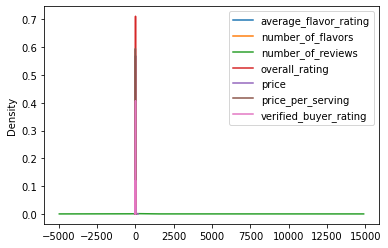

In [347]:
# Plot the density graph
data.plot.density()

# Display the plot
plt.show()

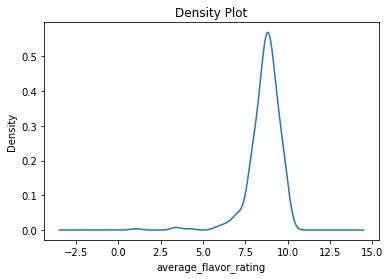

In [348]:
data['average_flavor_rating'].plot.density()

# Add labels and title to the graph
plt.xlabel('average_flavor_rating')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()

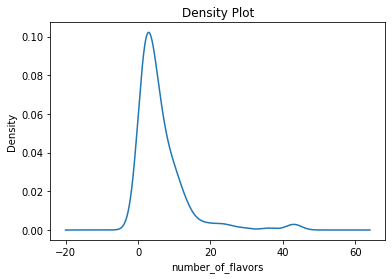

In [349]:
data['number_of_flavors'].plot.density()

# Add labels and title to the graph
plt.xlabel('number_of_flavors')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()

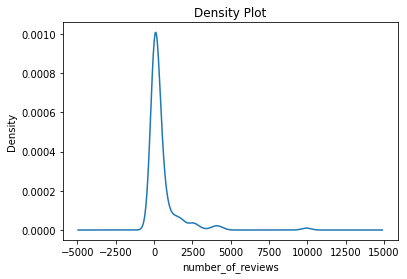

In [350]:
data['number_of_reviews'].plot.density()

# Add labels and title to the graph
plt.xlabel('number_of_reviews')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()

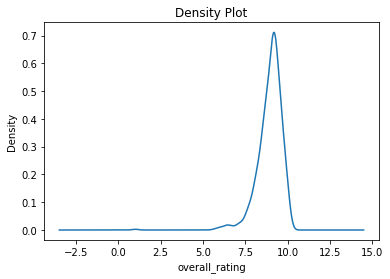

In [351]:
data['overall_rating'].plot.density()

# Add labels and title to the graph
plt.xlabel('overall_rating')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()

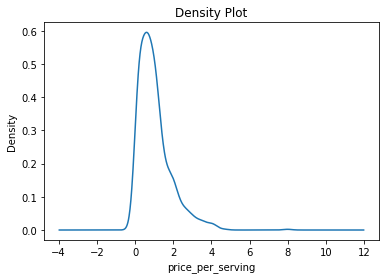

In [352]:
data['price_per_serving'].plot.density()

# Add labels and title to the graph
plt.xlabel('price_per_serving')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()

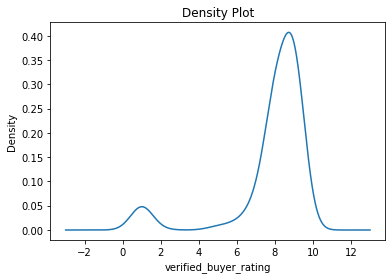

In [353]:
data['verified_buyer_rating'].plot.density()

# Add labels and title to the graph
plt.xlabel('verified_buyer_rating')
plt.ylabel('Density')
plt.title('Density Plot')

# Show the plot
plt.show()

 **Which independent variables have missing data? How much?**

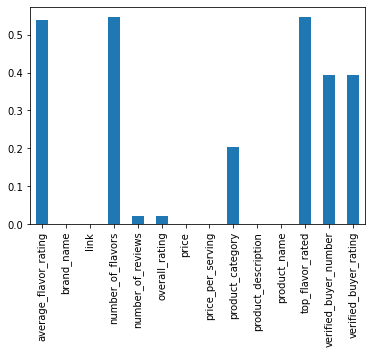

Features with Missing Data:
Index(['average_flavor_rating', 'number_of_flavors', 'number_of_reviews',
       'overall_rating', 'product_category', 'top_flavor_rated',
       'verified_buyer_number', 'verified_buyer_rating'],
      dtype='object')
Percentage of Missing Data:
average_flavor_rating    0.539286
number_of_flavors        0.546429
number_of_reviews        0.022619
overall_rating           0.022619
product_category         0.203571
top_flavor_rated         0.546429
verified_buyer_number    0.394048
verified_buyer_rating    0.394048
dtype: float64


In [354]:
import pandas as pd
import numpy as np

# Find the percentage of missing data for each column
missing_data = data.isnull().mean()

# Plot the percentage of missing data
missing_data.plot(kind='bar')
plt.show()

# Select the columns with missing data
selected_features = missing_data[missing_data > 0].index

print("Features with Missing Data:")
print(selected_features)

print("Percentage of Missing Data:")
print(missing_data[selected_features])


In [355]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Split the data into independent and dependent variables
X = data.drop('price_per_serving', axis=1)
y = data['price_per_serving']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [356]:
#Imputing using the Mode function for categorical data

data['product_category'] = data['product_category'].fillna(data['product_category'].mode()[0])
data['top_flavor_rated'] = data['top_flavor_rated'].fillna(data['top_flavor_rated'].mode()[0])
data['verified_buyer_number'] = data['verified_buyer_number'].fillna(data['verified_buyer_number'].mode()[0])


In [357]:
# Imputing the NULL Values in a column for using the Mean function
data['average_flavor_rating'] = data['average_flavor_rating'].fillna((data['average_flavor_rating'].mean()))
data['number_of_flavors'] = data['number_of_flavors'].fillna((data['number_of_flavors'].mean()))

In [358]:
#Imputing using padding

data['verified_buyer_rating'].fillna(method='pad', inplace=True)

In [359]:
from sklearn.impute import KNNImputer

In [360]:
imputer = KNNImputer(n_neighbors=3)

# Fit and transform the data using the imputer

data['number_of_reviews'] = imputer.fit_transform(data['number_of_reviews'].values.reshape(-1, 1))
data['overall_rating'] = imputer.fit_transform(data['overall_rating'].values.reshape(-1, 1))


In [361]:
#Checking if there are any null values after the imputation
data.isnull().any()

average_flavor_rating    False
brand_name               False
link                     False
number_of_flavors        False
number_of_reviews        False
overall_rating           False
price                    False
price_per_serving        False
product_category         False
product_description      False
product_name             False
top_flavor_rated         False
verified_buyer_number    False
verified_buyer_rating    False
dtype: bool

In [362]:
#Checking the sum of Null Values if they are present
data.isnull().sum()

average_flavor_rating    0
brand_name               0
link                     0
number_of_flavors        0
number_of_reviews        0
overall_rating           0
price                    0
price_per_serving        0
product_category         0
product_description      0
product_name             0
top_flavor_rated         0
verified_buyer_number    0
verified_buyer_rating    0
dtype: int64

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_flavor_rating  840 non-null    float64
 1   brand_name             840 non-null    object 
 2   link                   840 non-null    object 
 3   number_of_flavors      840 non-null    float64
 4   number_of_reviews      840 non-null    float64
 5   overall_rating         840 non-null    float64
 6   price                  840 non-null    float64
 7   price_per_serving      840 non-null    float64
 8   product_category       840 non-null    object 
 9   product_description    840 non-null    object 
 10  product_name           840 non-null    object 
 11  top_flavor_rated       840 non-null    object 
 12  verified_buyer_number  840 non-null    object 
 13  verified_buyer_rating  840 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


### **Label Encoding on Brand Name**

In [364]:
#Checking the unique brand name's in a column
print(data['brand_name'].unique())

['EVLUTION NUTRITION' 'Optimum Nutrition' 'JYM Supplement Science'
 'MuscleTech' 'BSN' 'RSP Nutrition' 'Kaged Muscle' 'Dymatize'
 'Bodybuilding.com Signature' 'Scivation' 'GAT' 'Animal' 'Cellucor'
 'Quest Nutrition' 'MusclePharm' 'Isopure' 'Grenade' 'AllMax Nutrition'
 'Pro Supps' 'Controlled Labs' 'Beverly International' "Lenny & Larry's"
 'COBRA LABS' 'Nutrex' 'Vigor Labs' 'NLA for Her' 'MRM' 'ONE' 'PEScience'
 'EFX Sports' 'Beast Sports Nutrition' 'PrimaForce' 'MET-Rx'
 'Body Nutrition' 'Six Star Pro Nutrition' 'Universal Nutrition'
 'Betancourt Nutrition' 'REDCON1' 'Gaspari Nutrition' 'Labrada' 'NOW'
 'Primeval Labs' 'Sports Research' 'CytoSport' 'S.A.N.' 'NutraBio'
 'MuscleMeds' 'ABB' 'AST' "Doctor's Best" 'Vitargo' 'iForce Nutrition'
 'Muscle Milk' 'PharmaFreak' 'MHP' 'FitMiss' 'Muscle Beach Nutrition'
 'True GRIT' 'BPI Sports' 'SNAC' 'Vega' 'Twinlab' 'Sparta Nutrition'
 'iSatori' 'RXBAR' 'Novex Biotech' 'Natrol' 'Celsius' 'OhYeah! Nutrition'
 'Garden Of Life' 'RIVALUS' 'Blue Sta

In [365]:

data['brand_name'].value_counts()

Optimum Nutrition      71
MuscleTech             57
EVLUTION NUTRITION     52
NOW                    46
Universal Nutrition    39
                       ..
True GRIT               1
Blackmarket             1
Sparta Nutrition        1
RXBAR                   1
Vital Proteins          1
Name: brand_name, Length: 93, dtype: int64

In [366]:
from sklearn.preprocessing import LabelEncoder


In [367]:
label_encoder = LabelEncoder()

In [368]:
print (label_encoder)

LabelEncoder()


In [369]:
data["brand_name"] = label_encoder.fit_transform(data["brand_name"])

In [370]:
data.head()

,average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
0,9.10000,26,https://sa.bodybuilding.com/store/evlution-nut...,29.000000,2575.0,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,BCAA Energy,Pink Starblast,1594,9.0
1,8.40000,62,https://sa.bodybuilding.com/store/opt/whey.htm...,43.000000,9926.0,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,Gold Standard 100% Whey,Unflavored,3932,9.0
2,8.30000,36,https://sa.bodybuilding.com/store/jym/pre-jym....,9.000000,3947.0,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,Pre JYM,Raspberry Lemonade,3471,9.0
3,8.66615,62,https://sa.bodybuilding.com/store/opt/essentia...,6.288714,2466.0,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural S...,Essential AmiN.O. Energy,Unflavored,1,9.0
4,8.70000,36,https://sa.bodybuilding.com/store/jym/pro-jym....,14.000000,2506.0,9.2,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",Pro JYM,S'mores,2275,9.0


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   average_flavor_rating  840 non-null    float64
 1   brand_name             840 non-null    int64  
 2   link                   840 non-null    object 
 3   number_of_flavors      840 non-null    float64
 4   number_of_reviews      840 non-null    float64
 5   overall_rating         840 non-null    float64
 6   price                  840 non-null    float64
 7   price_per_serving      840 non-null    float64
 8   product_category       840 non-null    object 
 9   product_description    840 non-null    object 
 10  product_name           840 non-null    object 
 11  top_flavor_rated       840 non-null    object 
 12  verified_buyer_number  840 non-null    object 
 13  verified_buyer_rating  840 non-null    float64
dtypes: float64(7), int64(1), object(6)
memory usage: 92.0+ KB


In [372]:
data

,average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
0,9.10000,26,https://sa.bodybuilding.com/store/evlution-nut...,29.000000,2575.000000,9.400000,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced fr...,BCAA Energy,Pink Starblast,1594,9.0
1,8.40000,62,https://sa.bodybuilding.com/store/opt/whey.htm...,43.000000,9926.000000,9.300000,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscl...,Gold Standard 100% Whey,Unflavored,3932,9.0
2,8.30000,36,https://sa.bodybuilding.com/store/jym/pre-jym....,9.000000,3947.000000,9.100000,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-H...,Pre JYM,Raspberry Lemonade,3471,9.0
3,8.66615,62,https://sa.bodybuilding.com/store/opt/essentia...,6.288714,2466.000000,9.100000,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural S...,Essential AmiN.O. Energy,Unflavored,1,9.0
4,8.70000,36,https://sa.bodybuilding.com/store/jym/pro-jym....,14.000000,2506.000000,9.200000,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop wi...",Pro JYM,S'mores,2275,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,8.66615,88,https://sa.bodybuilding.com/store/vital_protei...,6.288714,483.512789,8.950914,43.00,1.54,Whey Protein,Contains 20g of Collagen and 18g of Protein Pe...,Collagen Peptides,Unflavored,1,1.0
836,8.66615,0,https://sa.bodybuilding.com/store/merica-labz/...,6.288714,483.512789,8.950914,62.99,1.05,Whey Protein,Cold-pressed and microfiltered for greater mix...,Patriot's Whey,Unflavored,1,1.0
837,8.66615,42,https://sa.bodybuilding.com/store/met/superjoi...,6.288714,26.000000,8.500000,21.77,0.73,Glucosamine,Omega 3-6-9 Blend,Super Joint Guard,Unflavored,1,1.0
838,8.66615,33,https://sa.bodybuilding.com/store/grenade/carb...,6.288714,483.512789,8.950914,30.05,2.50,Whey Protein,15g of High Quality Protein to Support Muscle ...,Carb Killa Brownie,Unflavored,1,1.0


In [373]:
'''numerical = ['average_flavor_rating', 'brand_name', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price','price_per_serving','verified_buyer_rating']
categorical = ['brand_name','link','product_category','product_description, 'product_name', 'top_flavor_rated', 'verified_buyer_number']'''

"numerical = ['average_flavor_rating', 'brand_name', 'number_of_flavors',\n       'number_of_reviews', 'overall_rating', 'price','price_per_serving','verified_buyer_rating']\ncategorical = ['brand_name','link','product_category','product_description, 'product_name', 'top_flavor_rated', 'verified_buyer_number']"

<Figure size 576x360 with 0 Axes>

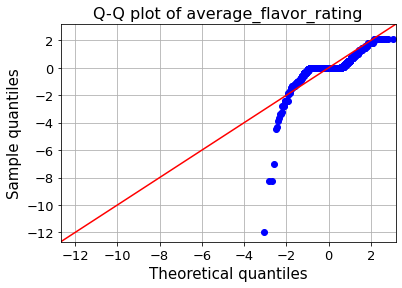

<Figure size 576x360 with 0 Axes>

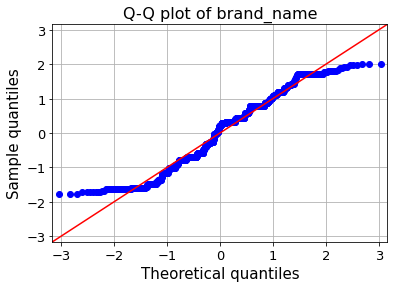

<Figure size 576x360 with 0 Axes>

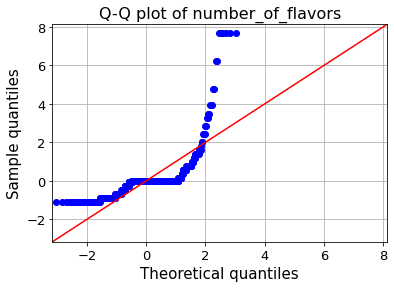

<Figure size 576x360 with 0 Axes>

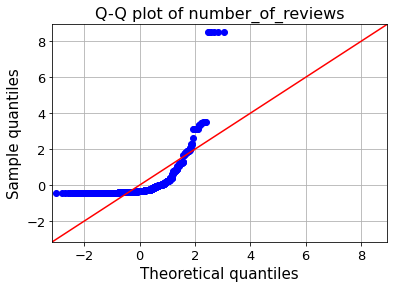

<Figure size 576x360 with 0 Axes>

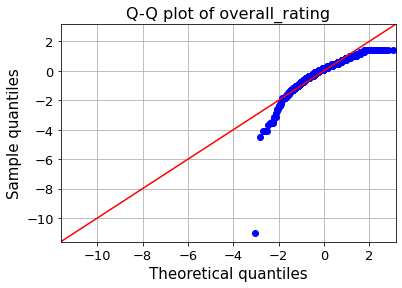

<Figure size 576x360 with 0 Axes>

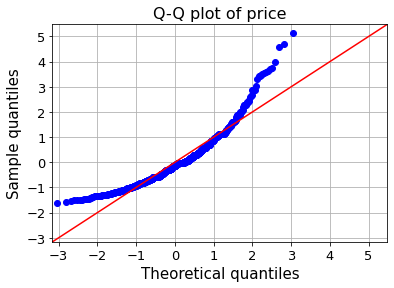

<Figure size 576x360 with 0 Axes>

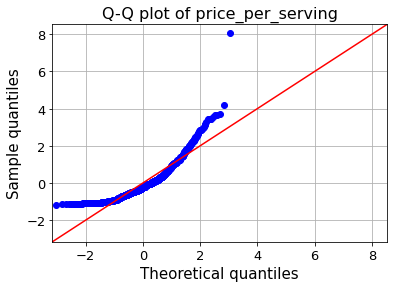

<Figure size 576x360 with 0 Axes>

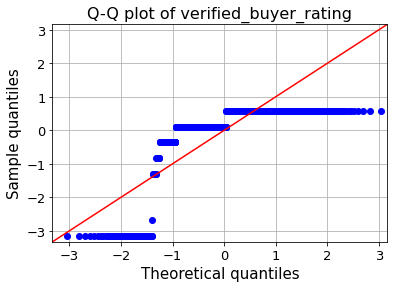

In [374]:
#checking the distribution of independent variables using qqplot
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['average_flavor_rating', 'brand_name', 'number_of_flavors', 'number_of_reviews',
       'overall_rating','price','price_per_serving','verified_buyer_rating']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

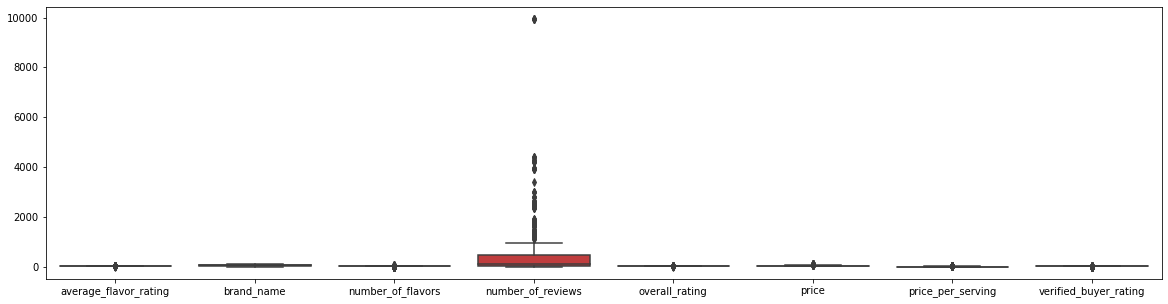

In [375]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,5))
sns.boxplot(data=data)

In [376]:
#checking the correlation between all the features in the data
data.corr()

,average_flavor_rating,brand_name,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,verified_buyer_rating
average_flavor_rating,1.000000,0.044978,-0.066770,-0.026659,0.485694,-0.061520,-0.072458,-0.040311
brand_name,0.044978,1.000000,-0.033959,-0.015058,0.020771,-0.099230,-0.086795,-0.023398
number_of_flavors,-0.066770,-0.033959,1.000000,0.638585,0.024677,0.117901,0.039553,0.112598
number_of_reviews,-0.026659,-0.015058,0.638585,1.000000,0.057108,0.106269,-0.010065,0.122978
overall_rating,0.485694,0.020771,0.024677,0.057108,1.000000,-0.052497,-0.042295,0.073129
price,-0.061520,-0.099230,0.117901,0.106269,-0.052497,1.000000,0.384429,-0.058544
price_per_serving,-0.072458,-0.086795,0.039553,-0.010065,-0.042295,0.384429,1.000000,-0.060802
verified_buyer_rating,-0.040311,-0.023398,0.112598,0.122978,0.073129,-0.058544,-0.060802,1.000000



**In the predictor variables independent of all the other predictor variables?**

Here is a correlation matrix to show the coorelation between all the predictor variables

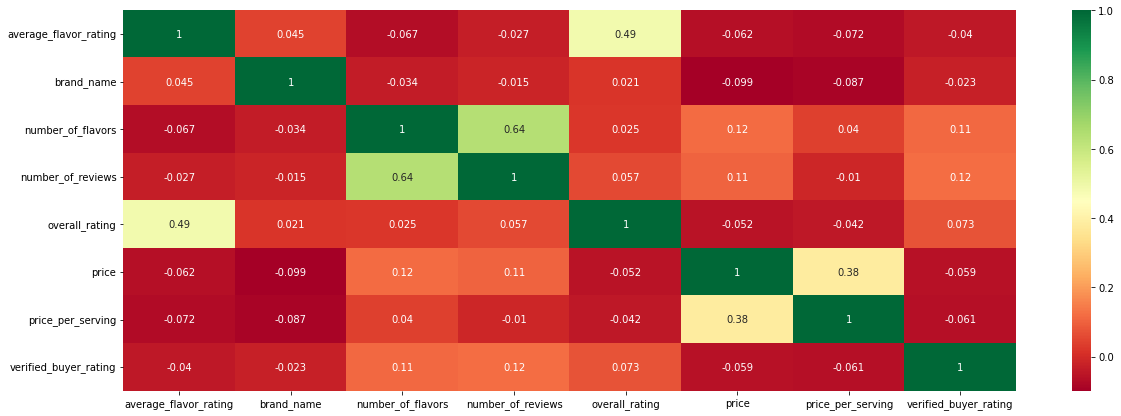

In [377]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

**Which predictor variables are the most important?**

price and number of variables are the most important predictor variables that can be seen in the matrix below

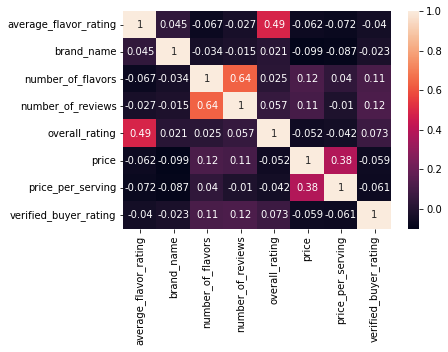

Positively Correlated Variables:
price                    0.384429
number_of_flavors        0.039553
number_of_reviews       -0.010065
overall_rating          -0.042295
verified_buyer_rating   -0.060802
average_flavor_rating   -0.072458
brand_name              -0.086795
Name: price_per_serving, dtype: float64
Negatively Correlated Variables:
brand_name              -0.086795
average_flavor_rating   -0.072458
verified_buyer_rating   -0.060802
overall_rating          -0.042295
number_of_reviews       -0.010065
number_of_flavors        0.039553
price                    0.384429
Name: price_per_serving, dtype: float64


In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Find the most positively and negatively correlated variables with the target
target = 'price_per_serving'
positive_correlation = corr_matrix[target].sort_values(ascending=False).drop(target).head(10)
negative_correlation = corr_matrix[target].sort_values().drop(target).head(10)

print("Positively Correlated Variables:")
print(positive_correlation)

print("Negatively Correlated Variables:")
print(negative_correlation)


**Do the ranges of the predictor variables make sense?**

Yes, the range of the predictor variables makes sense as they follow a normal distribution curve and also the mean is in the range bearing a positive value 

In [379]:
data.describe()

,average_flavor_rating,brand_name,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,verified_buyer_rating
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,8.666150,42.976190,6.288714,483.512789,8.950914,30.292274,1.033310,7.786905
std,0.640421,24.413832,4.774815,1111.930069,0.723743,17.358937,0.862362,2.160115
min,1.000000,0.000000,1.000000,1.000000,1.000000,2.490000,0.020000,1.000000
25%,8.666150,24.000000,5.000000,26.000000,8.600000,17.985000,0.430000,8.000000
50%,8.666150,48.000000,6.288714,98.000000,9.100000,27.990000,0.830000,8.000000
75%,8.700000,62.000000,6.288714,453.250000,9.400000,37.990000,1.330000,9.000000
max,10.000000,92.000000,43.000000,9926.000000,10.000000,119.530000,7.990000,9.000000


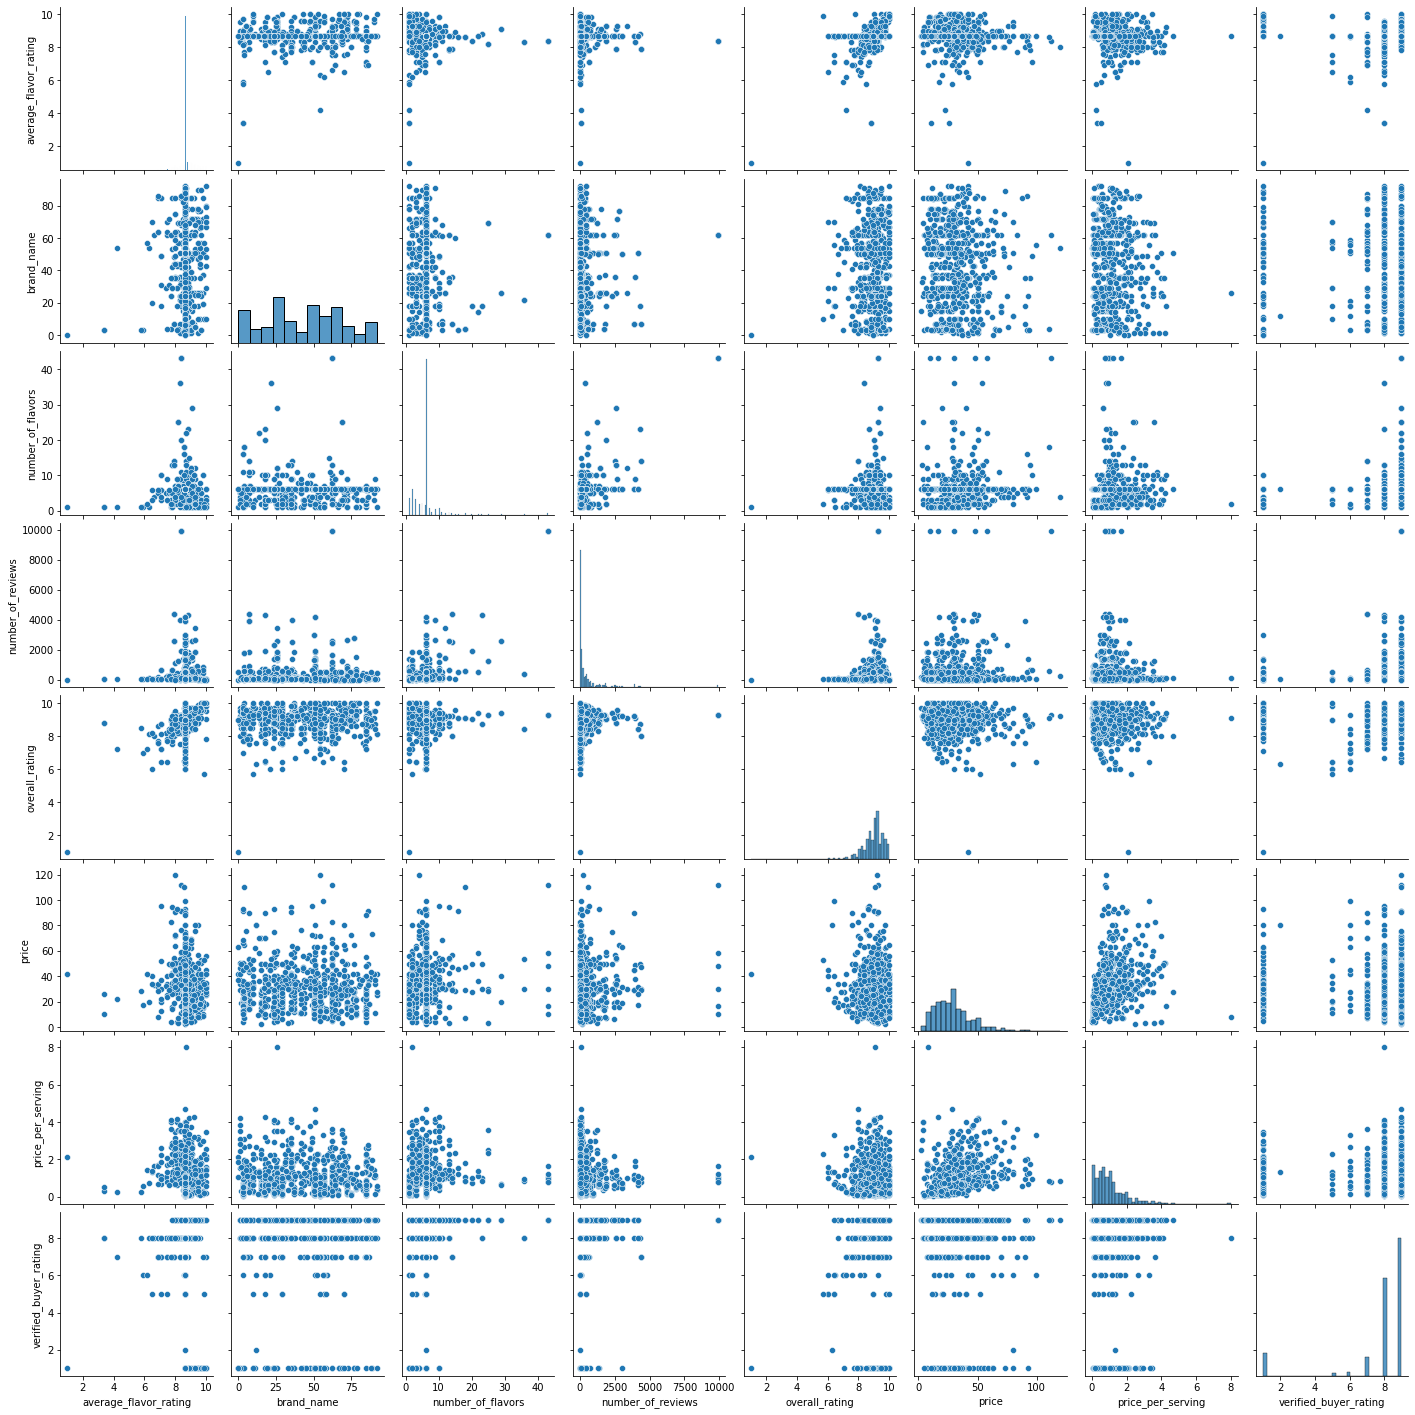

In [380]:
#pair plot to check the colinearity
sns.pairplot(data) 

**Understanding the main variable of the dataset "price_per_serving"**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


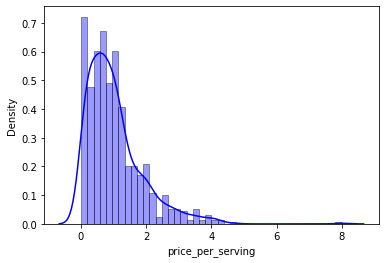

In [381]:
sns.distplot(data['price_per_serving'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [382]:
data.columns

Index(['average_flavor_rating', 'brand_name', 'link', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price', 'price_per_serving',
       'product_category', 'product_description', 'product_name',
       'top_flavor_rated', 'verified_buyer_number', 'verified_buyer_rating'],
      dtype='object')

In [383]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['price_per_serving'], data[['average_flavor_rating', 'brand_name', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price','verified_buyer_rating' ]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      price_per_serving   R-squared (uncentered):                   0.652
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              222.5
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                   7.69e-186
Time:                        04:17:17   Log-Likelihood:                         -998.47
No. Observations:                 840   AIC:                                      2011.
Df Residuals:                     833   BIC:                                      2044.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
average_flavor_rating     0.0018      0.041      0.043      0.965      -0.079       0.082
brand_name               -0.0014      0.001     -1.235      0.217      -0.004       0.001
number_of_flavors         0.0098      0.007      1.304      0.193      -0.005       0.024
number_of_reviews     -6.601e-05   3.22e-05     -2.051      0.041      -0.000   -2.83e-06
overall_rating            0.0570      0.040      1.412      0.158      -0.022       0.136
price                     0.0196      0.002     12.340      0.000       0.016       0.023
verified_buyer_rating    -0.0076      0.013     -0.600      0.549      -0.032       0.017
==============================================================================
Omnibus:                      459.716   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4920.373
Skew:                           2.268   Prob(JB):                         0.00
Kurtosis:                      13.955   Cond. No.                     2.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Do the training and test sets have the same data?**

The data is split into three sets, Training 76.5%, Validation set 13.5% and Test set 10%

In [384]:
from sklearn.model_selection import  train_test_split

X = data[ ['average_flavor_rating', 'brand_name', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price','verified_buyer_rating']]

y = data['price_per_serving']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

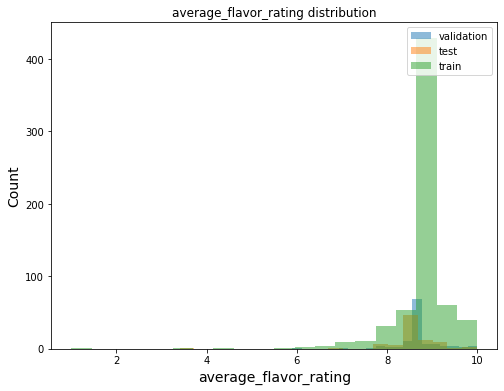

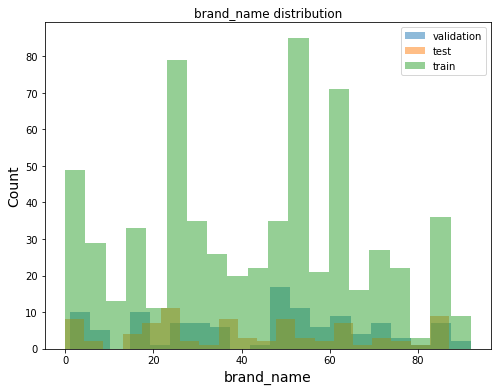

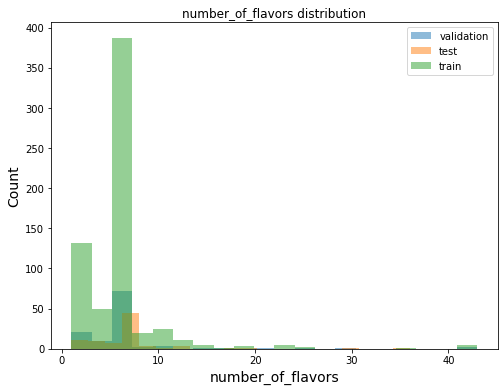

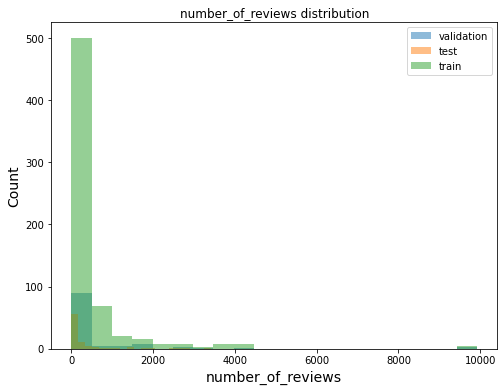

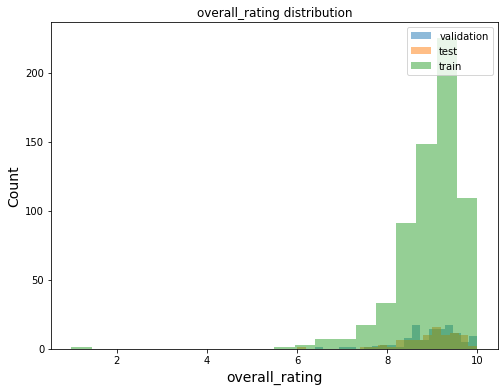

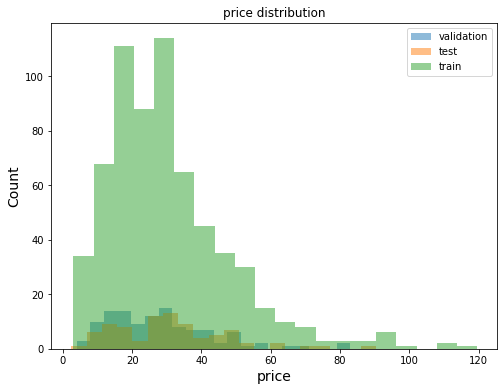

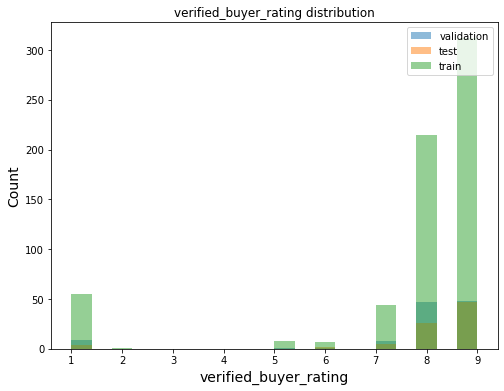

In [385]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['average_flavor_rating', 'brand_name', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price','verified_buyer_rating']]

X_val_plot = X_val[['average_flavor_rating', 'brand_name', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price','verified_buyer_rating']]

X_train_plot = X_train[['average_flavor_rating', 'brand_name', 'number_of_flavors',
       'number_of_reviews', 'overall_rating', 'price','verified_buyer_rating']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [386]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [387]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [388]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.63
Coefficient of determination: 0.15
R^2 score on training set = 0.1496065384882913


In [389]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.53
Coefficient of determination: 0.17
R^2 score on test set = 0.17124050543795732


In [390]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.66
Coefficient of determination: 0.18
R^2 score on validation set = 0.176840048017323


In [391]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3194 ± 0.1953,price
0.0043 ± 0.0230,brand_name
0.0033 ± 0.0161,verified_buyer_rating
-0.0001 ± 0.0021,overall_rating
-0.0003 ± 0.0235,number_of_reviews
-0.0014 ± 0.0022,number_of_flavors
-0.0157 ± 0.0326,average_flavor_rating


***Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values? That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.***

In [392]:
data['price_per_serving'].describe()

count    840.000000
mean       1.033310
std        0.862362
min        0.020000
25%        0.430000
50%        0.830000
75%        1.330000
max        7.990000
Name: price_per_serving, dtype: float64

**Create 3 col. for numbers for 1%, 5% and 10% missing data**

In [393]:
df_number = data[['price']]
df_number['number_copy_1_percent'] = df_number[['price']]
df_number['number_copy_5_percent'] = df_number[['price']]
df_number['number_copy_10_percent'] = df_number[['price']]
df_number['sample_price'] = data[['price_per_serving']]
df_number['sample_price'] = df_number['sample_price']/1000
df_number

<ipython-input-393-80e0ee37c390>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number['number_copy_1_percent'] = df_number[['price']]
<ipython-input-393-80e0ee37c390>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_number['number_copy_5_percent'] = df_number[['price']]
<ipython-input-393-80e0ee37c390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,price,number_copy_1_percent,number_copy_5_percent,number_copy_10_percent,sample_price
0,19.99,19.99,19.99,19.99,0.00067
1,57.99,57.99,57.99,57.99,0.00079
2,48.99,48.99,48.99,48.99,0.00163
3,18.99,18.99,18.99,18.99,0.00063
4,56.98,56.98,56.98,56.98,0.00110
...,...,...,...,...,...
835,43.00,43.00,43.00,43.00,0.00154
836,62.99,62.99,62.99,62.99,0.00105
837,21.77,21.77,21.77,21.77,0.00073
838,30.05,30.05,30.05,30.05,0.00250


# Check % missing values in this dataframe

In [394]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

In [395]:
print(get_percent_missing(df_number))

                                   column_name  percent_missing
price                                    price              0.0
number_copy_1_percent    number_copy_1_percent              0.0
number_copy_5_percent    number_copy_5_percent              0.0
number_copy_10_percent  number_copy_10_percent              0.0
sample_price                      sample_price              0.0


# Create missing helper fn

In [396]:
def create_missing(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

## Create missing data in each col

In [397]:
create_missing(df_number, 0.01, 'number_copy_1_percent')
create_missing(df_number, 0.05, 'number_copy_5_percent')
create_missing(df_number, 0.1, 'number_copy_10_percent')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [398]:
print(get_percent_missing(df_number))

                                   column_name  percent_missing
price                                    price         0.000000
number_copy_1_percent    number_copy_1_percent         0.952381
number_copy_5_percent    number_copy_5_percent         5.000000
number_copy_10_percent  number_copy_10_percent        10.000000
sample_price                      sample_price         0.000000


In [399]:
# Store Index of NaN values in each coloumns
number_1_idx = list(np.where(df_number['number_copy_1_percent'].isna())[0])
number_5_idx = list(np.where(df_number['number_copy_5_percent'].isna())[0])
number_10_idx = list(np.where(df_number['number_copy_10_percent'].isna())[0])

In [400]:
print(f"Length of number_1_idx is {len(number_1_idx)} and it contains {(len(number_1_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")
print(f"Length of number_5_idx is {len(number_5_idx)} and it contains {(len(number_5_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")
print(f"Length of number_10_idx is {len(number_10_idx)} and it contains {(len(number_10_idx)/len(df_number['number_copy_1_percent']))*100}% of total data in column | Total rows: {len(df_number['number_copy_1_percent'])}")

Length of number_1_idx is 8 and it contains 0.9523809523809524% of total data in column | Total rows: 840
Length of number_5_idx is 42 and it contains 5.0% of total data in column | Total rows: 840
Length of number_10_idx is 84 and it contains 10.0% of total data in column | Total rows: 840


In [401]:
#Creating a seperate dataframe for performing the KNN imputation
df_number1 = df_number[['sample_price','number_copy_10_percent']]
imputer = KNNImputer(n_neighbors=5)
imputed_number_df = pd.DataFrame(imputer.fit_transform(df_number1), columns = df_number1.columns)

In [402]:
imputed_number_df.sample(10)

,sample_price,number_copy_10_percent
151,0.00227,40.920
483,0.00027,10.990
584,0.00013,11.530
630,0.00016,14.590
6,0.00101,23.264
667,0.00034,20.400
232,0.00047,62.990
798,0.00128,93.290
351,0.00028,16.840
582,0.00331,99.210


In [403]:
print(get_percent_missing(imputed_number_df))

                                   column_name  percent_missing
sample_price                      sample_price              0.0
number_copy_10_percent  number_copy_10_percent              0.0


In [404]:
imputed_number_df['original'] = df_number['price']

In [405]:
imputed_number_df['diff'] = imputed_number_df['original'] - imputed_number_df['number_copy_10_percent']

In [406]:
for i in number_10_idx:
    print(str(imputed_number_df['number_copy_10_percent'][i])+", "+str(imputed_number_df['original'][i])+", "+str(imputed_number_df['diff'][i]))

14.874, 7.55, -7.324000000000001
23.264, 30.39, 7.126000000000001
39.254000000000005, 24.99, -14.264000000000006
39.788000000000004, 27.99, -11.798000000000005
24.184, 14.6, -9.584000000000001
31.996, 24.99, -7.006
14.144, 14.97, 0.8260000000000005
35.032000000000004, 52.8, 17.767999999999994
15.978, 15.99, 0.012000000000000455
49.946000000000005, 42.49, -7.456000000000003
37.42, 33.14, -4.280000000000001
21.896, 28.99, 7.093999999999998
14.0, 15.37, 1.3699999999999992
35.426, 19.99, -15.436000000000003
14.144, 8.7, -5.444000000000001
13.652000000000001, 15.99, 2.337999999999999
29.589999999999996, 29.99, 0.40000000000000213
25.29, 49.99, 24.700000000000003
26.157999999999998, 19.99, -6.167999999999999
29.589999999999996, 29.99, 0.40000000000000213
39.254000000000005, 24.99, -14.264000000000006
23.958000000000002, 27.19, 3.2319999999999993
40.07, 39.99, -0.0799999999999983
35.436, 29.99, -5.4460000000000015
27.52, 24.99, -2.530000000000001
45.634, 36.7, -8.933999999999997
13.132, 28.65

In [407]:
imputed_number_df.to_csv('imputed_number_df.csv', index=False)

In [408]:
# create list of difference bwtween imputed and orginal value

number_diff_1 = []
number_diff_5 = []
number_diff_10 = []
count = 0
'''
for i in number_1_idx:
    count +=1
    diff1 = abs(imputed_number_df['number_copy_1_percent'][i] - df_number['price'][i])
    number_diff_1.append(diff1)

for i in number_5_idx:
    diff5 = abs(imputed_number_df['number_copy_5_percent'][i] - df_number['price'][i])
    number_diff_5.append(diff5)
'''
for i in number_10_idx:
    diff10 = abs(imputed_number_df['number_copy_10_percent'][i] - df_number['price'][i])
    number_diff_10.append(diff10)

In [409]:
#print(len(number_diff_1))
#print(len(number_diff_5))
print(len(number_diff_10))

84


84% of the Missing Values were recovered using the KNN imputation technique

## **OUTLIERS**

In [410]:
pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [411]:
#detecting outliers
from datasist.structdata import detect_outliers
i= detect_outliers(data,0,['average_flavor_rating', 'brand_name', 'number_of_flavors','number_of_reviews', 'overall_rating', 'price','verified_buyer_rating'])
#removing outliers
data.drop(i,axis=0,inplace=True)

**Running the Regression model without outliers**

In [412]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [413]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.63
Coefficient of determination: 0.15
R^2 score on training set = 0.1496065384882913


In [414]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.53
Coefficient of determination: 0.17
R^2 score on test set = 0.17124050543795732


In [415]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.66
Coefficient of determination: 0.18
R^2 score on validation set = 0.176840048017323


In [416]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3194 ± 0.1953,price
0.0043 ± 0.0230,brand_name
0.0033 ± 0.0161,verified_buyer_rating
-0.0001 ± 0.0021,overall_rating
-0.0003 ± 0.0235,number_of_reviews
-0.0014 ± 0.0022,number_of_flavors
-0.0157 ± 0.0326,average_flavor_rating


# References:
1) https://www.w3schools.com/python/pandas/pandas_cleaning.asp

2)https://www.w3schools.com/python/pandas/pandas_correlations.asp

3)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

4)https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb